<a href="https://colab.research.google.com/github/mk-armah/Breast-Cancer-Segmentation/blob/model/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch.nn as nn
import os
import numpy as np
from google.colab import files
import cv2
#upload kaggle api key

# files.upload() #uncomment this to upload kaggle api keys

In [ ]:
!pip install -q kaggle #install kaggle 

In [ ]:
!mkdir -p ~/.kaggle #create a kaggle directory where the key will be hosted

In [ ]:
!cp ./kaggle.json ~/.kaggle #copy kaggle key to working directory

In [ ]:
!ls ~/.kaggle #listing files in the directory

kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json #give permissions

In [ ]:
! kaggle datasets list -s ["Breast Ultrasound Images"]

ref                                                             title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
aryashah2k/breast-ultrasound-images-dataset                     Breast Ultrasound Images Dataset              195MB  2021-03-14 04:29:54           7788        157  1.0              
mohammedtgadallah/mt-small-dataset                              MT_Small_Dataset                               15MB  2021-05-20 23:39:41            187          3  0.25             
MIMBCD-UI/uta4-sm-vs-mm-sheets-nameless                         [AVI 2020] UTA4: SM vs MM (Nameless)            2KB  2020-04-05 16:17:39             40          6  0.64705884       
mohammedtgadallah/ten-cnns-for-breast-us-images-classification  Ten_CNNs_for_Breast_US_Ima

In [ ]:
!mkdir ./Breast_Cancer_Segmentation

In [ ]:
os.chdir("./Breast_Cancer_Segmentation")
os.getcwd()

'/content/drive/MyDrive/Coding-Stuffs/Artificial Intelligence/Computer Vision /Breast_Cancer_Segmentation'

In [ ]:
#lets go for the dataset with the highest vote count :-)

! kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset

 98% 191M/195M [00:01<00:00, 188MB/s]
100% 195M/195M [00:01<00:00, 187MB/s]


In [ ]:
!unzip ./breast-ultrasound-images-dataset.zip

Archive:  ./breast-ultrasound-images-dataset.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104)_mask.png  
  inflating: Da

In [ ]:
os.listdir()

['breast-ultrasound-images-dataset.zip',
 'Dataset_BUSI_with_GT',
 'dataclass.py',
 '.ipynb_checkpoints']

In [ ]:
def load_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item),0)
        if img is not None:
            images.append([img,target])
    return images

In [ ]:
benign = load_images("./Dataset_BUSI_with_GT/benign/",0)
malignant  = load_images("./Dataset_BUSI_with_GT/malignant/",1)
normal = load_images("./Dataset_BUSI_with_GT/normal/",3)

In [ ]:
print("Number of Samples on Benign >> ",len(benign))
print("Number of Samples on Malignant >> ",len(malignant))
print("Number of Samples on Normal >>",len(normal))

Number of Samples on Benign >>  891
Number of Samples on Malignant >>  421
Number of Samples on Normal >> 266


tensor([ 0.6650,  0.1915, -0.1772,  1.5139,  1.0795])

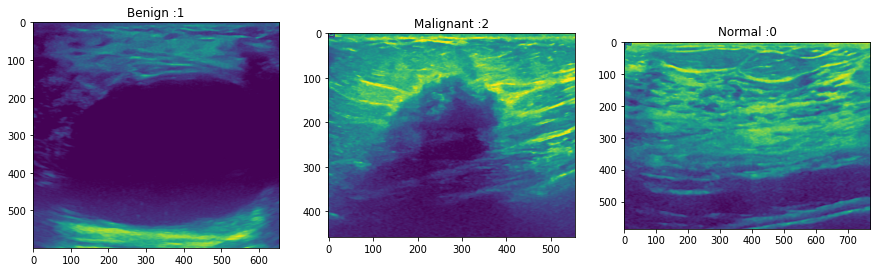

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize = (15,10))
#Benign
plt.subplot(1,3,1)
plt.title(f"Benign :1")
plt.imshow(benign[200][0])

#Malignant
plt.subplot(1,3,2)
plt.title(f"Malignant :2")
plt.imshow(malignant[200][0])

#Normal segment
plt.subplot(1,3,3)
plt.title(f"Normal :0")
plt.imshow(normal[200][0])

In [ ]:
os.listdir("./Dataset_BUSI_with_GT/benign")[:20]

['benign (1).png',
 'benign (1)_mask.png',
 'benign (10).png',
 'benign (10)_mask.png',
 'benign (100).png',
 'benign (100)_mask.png',
 'benign (100)_mask_1.png',
 'benign (101).png',
 'benign (101)_mask.png',
 'benign (102).png',
 'benign (102)_mask.png',
 'benign (103).png',
 'benign (103)_mask.png',
 'benign (104).png',
 'benign (104)_mask.png',
 'benign (105).png',
 'benign (105)_mask.png',
 'benign (106).png',
 'benign (106)_mask.png',
 'benign (107).png']